In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image on the web: https://www.themoscowtimes.com/2015/10/09/russian-recall-of-lucky-thief-license-plates-following-disruptive-popularity-a50175.

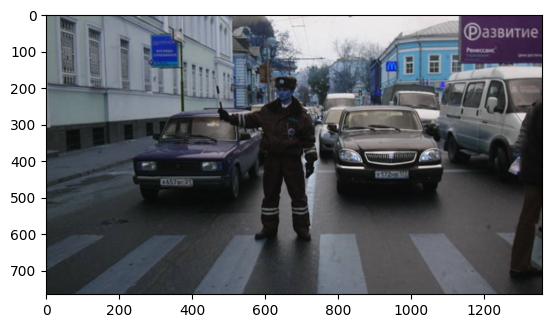

In [2]:
img = cv2.imread('Moscow_cars.jpg')
plt.imshow(img)

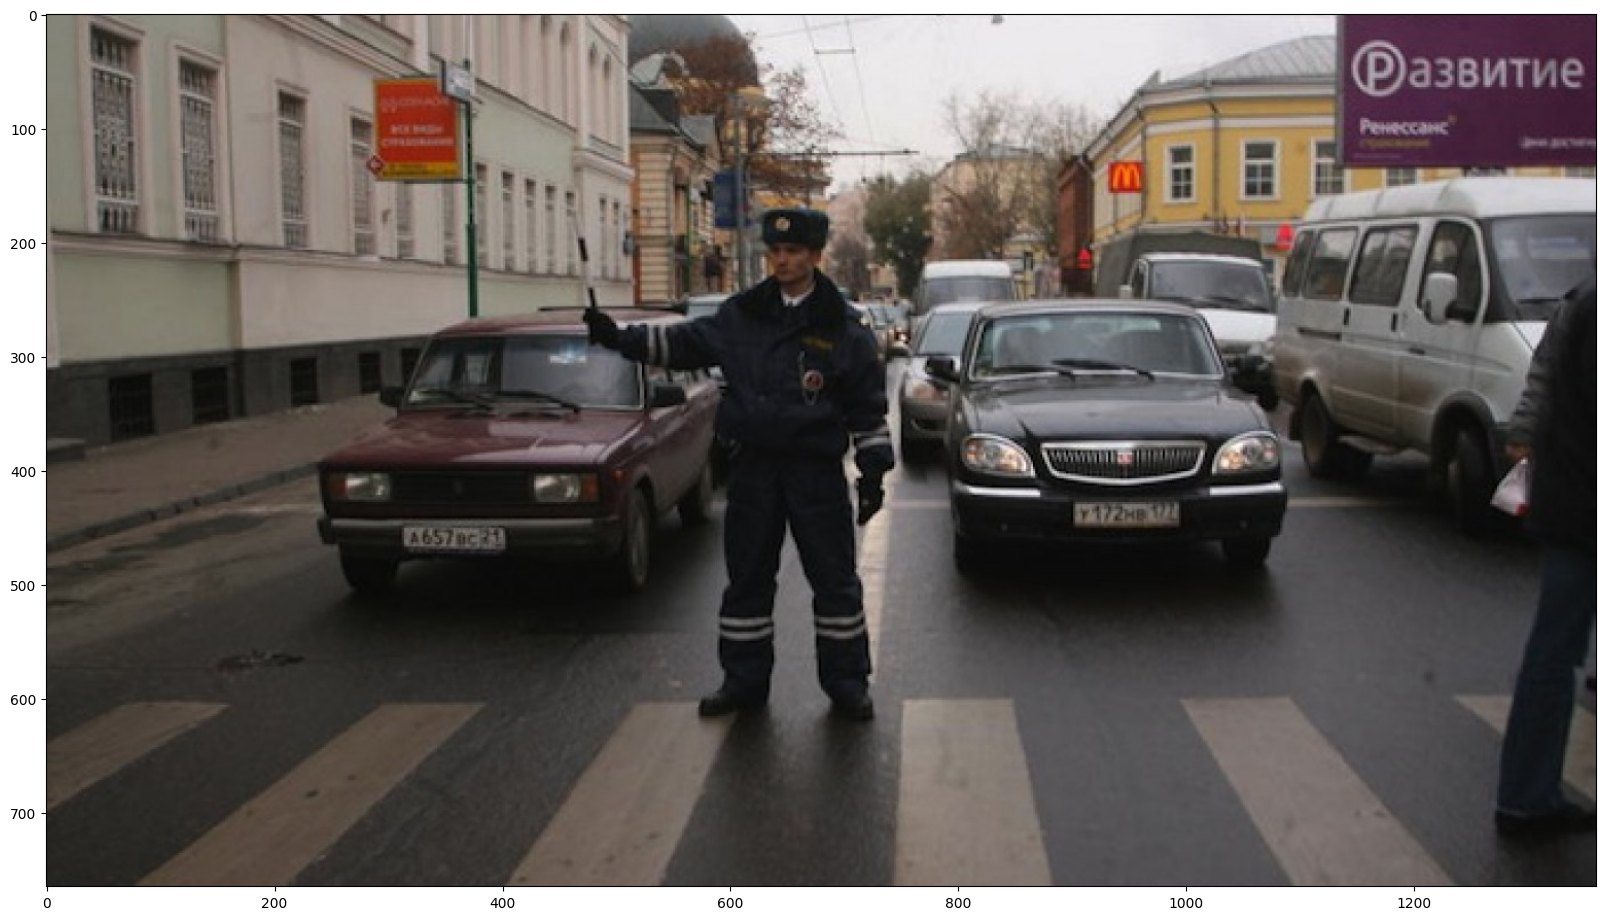

In [3]:
#I will make a bit larger so you can compare this with the final swapped plate image
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
pretrained = 'haarcascade_russian_plate_number.xml'

In [5]:
#converting the image to grayscale is needed for detection by the classifier
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#create a trained classifier object with the xml file
plate_cascade = cv2.CascadeClassifier(pretrained)

#detect the plate with the classifier
plate = plate_cascade.detectMultiScale(gray, scaleFactor = 1.05, minNeighbors = 5, minSize = (40,40))

#opting to print bounding boxes to console; this is useful for the plates defined later on -- will hard code this manually
print(plate)

[[1164   17  171   57]
 [ 809  359  186   62]
 [ 875  414  137   46]
 [ 291  435  133   45]]


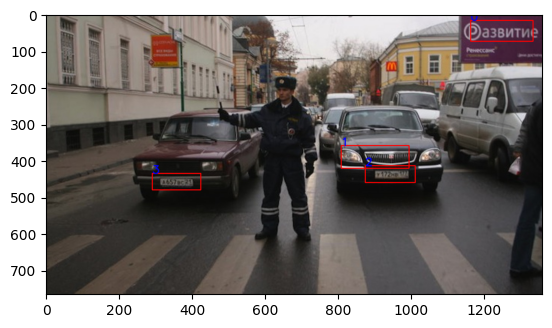

In [6]:
#use count to keep track of which are plates I want to swap
#the order of the plates detected is random each time you run this notebook; this is why I will manually hard code this later on
count = 0

#draw a rectangle around each detected plate with the list of returned bounding box coordinates
#don't want to overwrite the original image
detected_img = img

for (x, y, w, h) in plate:
    cv2.rectangle(detected_img, (x,y), (x + w, y + h), (0,0,255), 2) #red bounding box
    cv2.putText(detected_img, str(count), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    count+=1

#let's see what plates were detected; remember to reverse the color order
plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))

In [8]:
#plate of car on left has coordinates [ 291  435  133   45]
#plate of car on right has coordintes [ 875  414  137   46]

#here is the hard coding I mentioned previously
swap_this_plate_coords = [875,414,137,46]
with_this_plate_coords = [291,435,133,45]